In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

import joblib

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
true.duplicated().sum()

206

In [10]:
fake.duplicated().sum()

3

In [11]:
true.drop_duplicates(inplace=True)

In [12]:
fake.drop_duplicates(inplace=True)

In [13]:
true['label'] = 0
fake['label'] = 1

In [14]:
true.shape

(21211, 5)

In [15]:
fake.shape

(23478, 5)

In [16]:
df = pd.concat([true, fake], axis=0, ignore_index=True)

In [17]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [18]:
df.shape

(44689, 5)

In [19]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


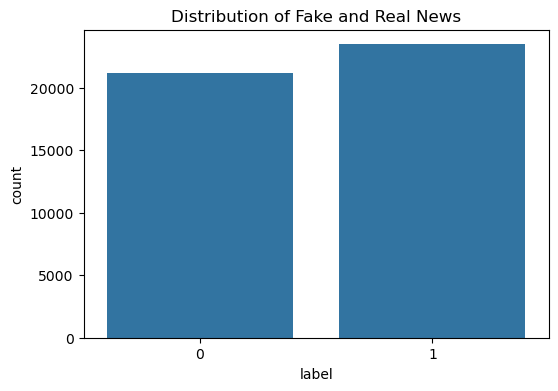

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Distribution of Fake and Real News")
plt.show()

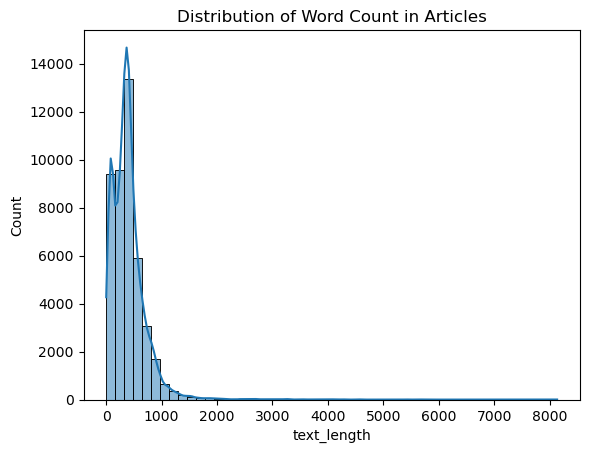

In [21]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Word Count in Articles")
plt.show()

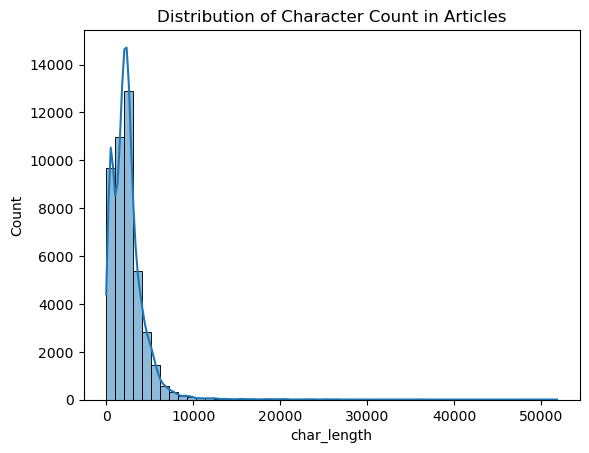

In [22]:
df["char_length"] = df["text"].apply(lambda x: len(str(x)))
sns.histplot(df["char_length"], bins=50, kde=True)
plt.title("Distribution of Character Count in Articles")
plt.show()

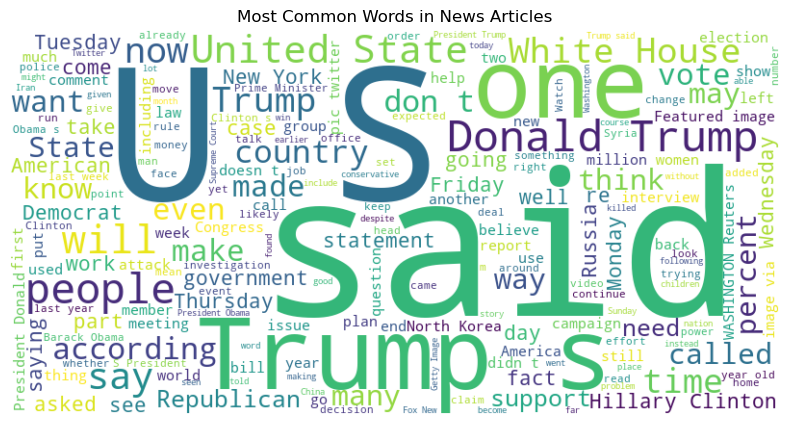

In [23]:
from wordcloud import WordCloud

text = " ".join(df["text"].dropna())  # Combine all text
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in News Articles")
plt.show()

In [24]:
from collections import Counter

# Function to get most common words
def get_common_words(texts, n=20):
    words = " ".join(texts).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

fake_words = get_common_words(df[df["label"] == 1]["text"])
real_words = get_common_words(df[df["label"] == 0]["text"])

print("Most common words in Fake News:", fake_words)
print("Most common words in Real News:", real_words)

Most common words in Fake News: [('trump', 65511), ('would', 23260), ('people', 22359), ('president', 22079), ('one', 21558), ('said', 21220), ('like', 16857), ('donald', 16800), ('obama', 16043), ('clinton', 15611), ('also', 14771), ('new', 13941), ('even', 13515), ('hillary', 12579), ('white', 12231), ('news', 12123), ('us', 11811), ('state', 10833), ('get', 10603), ('could', 10084)]
Most common words in Real News: [('said', 71167), ('u.s.', 37837), ('trump', 36050), ('would', 31006), ('-', 30762), ('president', 23142), ('said.', 21318), ('(reuters)', 21033), ('new', 16424), ('also', 15670), ('state', 15434), ('united', 15301), ('government', 15092), ('republican', 14419), ('house', 14415), ('told', 14048), ('could', 13425), ('last', 12389), ('people', 12243), ('one', 11665)]


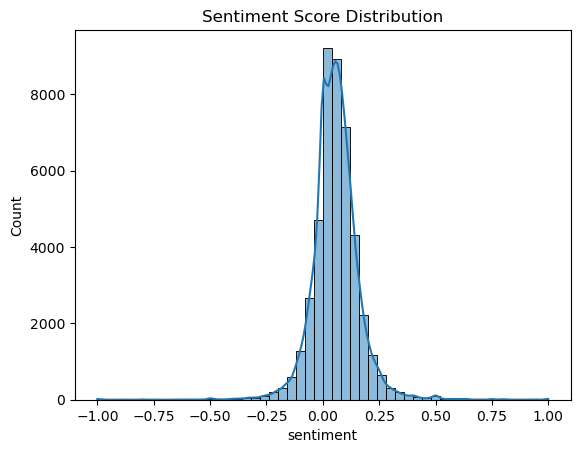

In [25]:
from textblob import TextBlob

df["sentiment"] = df["text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sns.histplot(df["sentiment"], bins=50, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

In [27]:
df = df.drop(columns=['date', 'subject'])

In [28]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [29]:
df.head()

,title,text,label,text_length,char_length,sentiment,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,749,4659,0.037083,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,624,4077,0.055880,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,457,2789,0.115930,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,376,2461,0.035968,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,852,5204,0.030093,seattle washington reuters president donald tr...


In [30]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba[:,1])) 

Accuracy: 0.9853434772879839
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4290
           1       0.99      0.99      0.99      4648

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

AUC-ROC Score: 0.9984423207314773


In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba[:,1])) 

Random Forest Accuracy: 0.9982098903557843
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4290
           1       0.99      0.99      0.99      4648

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

AUC-ROC Score: 0.9984423207314773


In [ ]:
joblib.dump(rf_model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')